In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM1y1', 'PM1y2', 'PM1y3','year', 'month', 'day']]
Y1 = df['PM1']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [9]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=4)

In [24]:
grad_boost = GradientBoostingRegressor(n_estimators=2500,
                                      max_depth=8,
                                      max_features=0.25,
                                      min_samples_split=4,
                                      min_samples_leaf=6,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=8, max_features=0.25,
                          min_samples_leaf=6, min_samples_split=4,
                          n_estimators=2500)

In [25]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.8761515011084946

Score on test data: 0.4741145981894368

Root Mean Squared Error: 76.30851982300494

Overall model accuracy: 0.4741145981894368


In [27]:
test=data.loc['207':'259']
X=test[['PM1y1', 'PM1y2', 'PM1y3','year', 'month', 'day']]
X

,PM1y1,PM1y2,PM1y3,year,month,day
207,428.861429,371.975714,416.398571,2019,12,29
208,456.537143,452.655714,332.717143,2020,1,5
209,349.680000,344.172857,282.434286,2020,1,12
210,405.144286,405.398571,346.604286,2020,1,19
211,223.215604,302.185714,237.858571,2020,1,26
212,225.330769,284.925714,251.350000,2020,2,2
213,198.920769,331.052857,328.171429,2020,2,9
214,333.581429,204.577143,279.338571,2020,2,16
215,192.155714,330.682857,275.608571,2020,2,23
216,172.547857,228.510000,280.377143,2020,3,1


In [28]:
predict=grad_boost.predict(X)

In [29]:
predict

array([333.81947701, 330.3779588 , 320.50390198, 313.0215187 ,
       282.66128238, 236.23744164, 259.01600509, 261.15173199,
       290.31708096, 233.43167999, 229.43891986, 236.86527019,
       250.08728242, 268.78885886, 236.54988822, 201.0460543 ,
       278.85693121, 276.19200782, 203.36344729, 263.21409915,
       253.10618701, 275.18105334, 247.50251272, 198.7140014 ,
       260.59961094, 261.44503651, 193.19480382, 142.00633355,
       179.73100813, 109.09226773, 112.08715574, 186.57286514,
       151.1596883 , 132.98764242, 121.58875756, 129.31401296,
       151.05708032, 124.42171994, 126.76549558, 123.0739521 ,
       204.609447  , 265.52774796, 309.43604904, 326.37165482,
       302.41349642, 356.50462449, 344.9349985 , 323.74241008,
       305.31123994, 399.29606525, 328.96660526, 342.4732523 ,
       326.51224777])

In [30]:
dates=data.loc['207':'259','From Date']

In [31]:
X['From Date']=dates.values

In [32]:
X.columns

Index(['PM1y1', 'PM1y2', 'PM1y3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [33]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [34]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [35]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [36]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

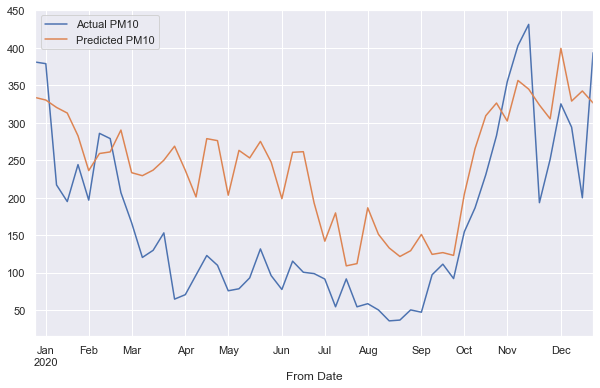

In [37]:
test['PM1'].plot(legend=True, label='Actual PM10', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM10')

In [38]:
np.sqrt(mean_squared_error(test['PM1'],X['pred']))

103.18674295816743

In [39]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 63.064310594347866
MSE: 5822.9901975779385
RMSE: 76.30851982300494
R-Squared: 0.4741145981894368


In [40]:
mae = metrics.mean_absolute_error(test['PM1'],X['pred'])
mse = metrics.mean_squared_error(test['PM1'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM1'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 91.44497431840782
MSE: 10647.503922314914
RMSE: 103.18674295816743
R-Squared: 0.1020813622941763


In [41]:
import pickle
filename = 'PM10_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [42]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.4741145981894368


# 3rd plot

In [43]:
testcase = pd.DataFrame()

In [44]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [45]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [46]:
testcase

,test,pred,Corrected
155,428.861429,378.960874,455.269394
156,456.537143,331.889682,408.198202
157,349.680000,318.820541,395.129060
158,405.144286,319.475190,395.783710
159,223.215604,295.895139,219.586619
160,225.330769,285.307603,208.999083
161,198.920769,297.079983,220.771464
162,333.581429,277.088194,353.396714
163,192.155714,293.866894,217.558374
164,172.547857,255.828756,179.520236


In [47]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [48]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8414624555045818

In [49]:
test2020=pd.DataFrame()

In [50]:
test2020['test']=test['PM1']
test2020['pred']=X['pred']

In [51]:
test2020.index=test.index

In [52]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

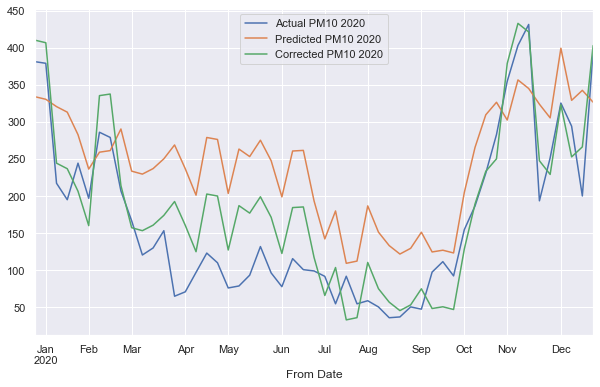

In [53]:
test2020['test'].plot(legend=True, label='Actual PM10 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM10 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM10 2020')

In [54]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.7869308432219668